In [886]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [887]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [888]:
import datetime
from datetime import timedelta

In [889]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [890]:
df['開標日期'] = pd.to_datetime(df['開標日期'])
df['開標日期']

0     2020-12-07
1     2020-12-04
2     2020-12-04
3     2020-12-03
4     2020-12-02
         ...    
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
209   2017-01-03
Name: 開標日期, Length: 210, dtype: datetime64[ns]

In [891]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)', '投標最後一天平均成交價',
       '撥券日開盤價'],
      dtype='object')

In [892]:
df.shape

(210, 24)

In [893]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

泰昇-KY     2
聯廣        2
精測        2
惠特科技      1
嘉基        1
         ..
致和證       1
詠昇        1
匯僑設計      1
世豐螺絲      1
羅麗芬-KY    1
Name: 證券名稱, Length: 207, dtype: int64

In [894]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016-03-10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [895]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017-01-03,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [896]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [897]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018-01-08,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [898]:
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標) 

In [899]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)

In [900]:
df.shape

(199, 24)

In [901]:
df[df['得標總金額(元)'] == '0']['證券名稱']

Series([], Name: 證券名稱, dtype: object)

* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

In [902]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"       

In [903]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
sum(df['類別'] == 'cb')

26

In [904]:
df['類別']

7      stock
8      stock
9         cb
10     stock
11     stock
       ...  
204    stock
205    stock
206    stock
207    stock
208    stock
Name: 類別, Length: 199, dtype: object

## 好奇每個時間投標熱度有沒有差

In [905]:
df_time = df[['開標日期','證券名稱','證券代號','類別','競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)','最高得標價格(元)', '得標加權平均價格(元)','投標最後一天平均成交價','總合格件', '合格投標數量(張)']]

In [906]:
df_time.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
類別                       object
競拍數量(張)                  object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
最高得標價格(元)                object
得標加權平均價格(元)              object
投標最後一天平均成交價             float64
總合格件                     object
合格投標數量(張)                object
dtype: object

In [907]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '總合格件', '合格投標數量(張)']
for col in obj_col:
    df_time[col] = df_time[col].apply(lambda x: x.replace(',', '')) 
    df_time[col] = df_time[col].apply(pd.to_numeric, errors = 'coerce')

In [908]:
df_time['總投標金額'] = df_time['得標加權平均價格(元)'] * df_time['合格投標數量(張)']
df_time['最低得標相對底標漲幅'] = df_time['最低得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['加權得標相對底標漲幅'] = df_time['得標加權平均價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['最高得標相對底標漲幅'] = df_time['最高得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['投標競爭度'] = df_time['合格投標數量(張)'] / df_time['競拍數量(張)']
df_time['每標平均張數'] = df_time['合格投標數量(張)'] / df_time['總合格件']

In [909]:
df_time.index = df_time['開標日期']

Text(0.5, 1.0, '最高得標相對底標漲幅(%)')

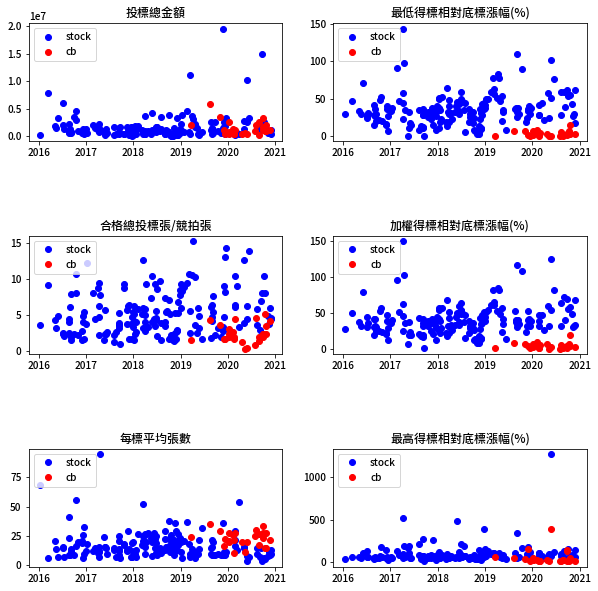

In [910]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.8)
ax[0,0].plot(df_time[df_time['類別'] == 'stock']['總投標金額'], 'bo')
ax[0,0].plot(df_time[df_time['類別'] == 'cb']['總投標金額'], 'ro')
ax[0,0].legend(['stock', 'cb'], loc = 2)
ax[0,0].set_title('投標總金額')

ax[1,0].plot(df_time[df_time['類別'] == 'stock']['投標競爭度'], 'bo')
ax[1,0].plot(df_time[df_time['類別'] == 'cb']['投標競爭度'], 'ro')
ax[1,0].legend(['stock', 'cb'], loc = 2)
ax[1,0].set_title('合格總投標張/競拍張')

ax[2,0].plot(df_time[df_time['類別'] == 'stock']['每標平均張數'], 'bo')
ax[2,0].plot(df_time[df_time['類別'] == 'cb']['每標平均張數'], 'ro')
ax[2,0].legend(['stock', 'cb'], loc = 2)
ax[2,0].set_title('每標平均張數')

ax[0,1].plot(df_time[df_time['類別'] == 'stock']['最低得標相對底標漲幅'], 'bo')
ax[0,1].plot(df_time[df_time['類別'] == 'cb']['最低得標相對底標漲幅'], 'ro')
ax[0,1].legend(['stock', 'cb'], loc = 2)
ax[0,1].set_title('最低得標相對底標漲幅(%)')

ax[1,1].plot(df_time[df_time['類別'] == 'stock']['加權得標相對底標漲幅'], 'bo')
ax[1,1].plot(df_time[df_time['類別'] == 'cb']['加權得標相對底標漲幅'], 'ro')
ax[1,1].legend(['stock', 'cb'], loc = 2)
ax[1,1].set_title('加權得標相對底標漲幅(%)')

ax[2,1].plot(df_time[df_time['類別'] == 'stock']['最高得標相對底標漲幅'], 'bo')
ax[2,1].plot(df_time[df_time['類別'] == 'cb']['最高得標相對底標漲幅'], 'ro')
ax[2,1].legend(['stock', 'cb'], loc = 2)
ax[2,1].set_title('最高得標相對底標漲幅(%)')

## 近兩年有四檔投標金額異常高：

In [911]:
df_time[['證券名稱','總投標金額']].sort_values(by = ['總投標金額'] ,ascending = False).head(4)

,證券名稱,總投標金額
開標日期,,
2019-11-25,和潤企業,19511129.54
2020-09-23,汎德永業,14825916.30
2019-03-13,緯穎,11033970.84
2020-05-25,昇佳電子,10149612.66


## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [912]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)','類別', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)']]
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,"3,740",stock,42.59,1,400,4.8,80.84,68.6
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,"1,800",stock,50,1,400,4.0,67.49,58.51
9,2020-11-23,台驊四,26364,櫃檯買賣,無擔保轉換公司債,"2,550",cb,102,1,400,0.5,NaN,104.2
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,"2,005",stock,48,1,400,5.0,68.97,62.4
11,2020-11-10,八貫,1342,集中交易市場,初上市,"4,234",stock,50,1,400,4.5,76.48,63.6


In [913]:
df_1.shape

(199, 13)

In [914]:
df_1['發行性質'].value_counts()

初上櫃         90
初上市         57
第一上市初上市     20
無擔保轉換公司債    18
有擔保轉換公司債     8
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [915]:
df1_stock = df_1[df_1['類別'] == 'stock']
df1_cb = df_1[df_1['類別'] == 'cb']

In [916]:
print('股票',df1_stock.shape[0],'可轉債', df1_cb.shape[0])

股票 173 可轉債 26


## 檢查缺失值 把股票和可轉債分開看


In [917]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      25
最低得標價格(元)         0
dtype: int64

In [918]:
df1_cb.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      26
最低得標價格(元)         0
dtype: int64

In [919]:
df1_stock.dropna(inplace = True)
df1_stock.shape

(148, 13)

In [920]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [921]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                  object
類別                       object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
dtype: object

In [922]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df1_stock[col] = df1_stock[col].apply(lambda x: x.replace(',', '')) 
    df1_stock[col] = df1_stock[col].apply(pd.to_numeric, errors = 'coerce')

df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [923]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                   int64
類別                       object
最低投標價格(元)               float64
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)               float64
dtype: object

## 來畫相關係數圖!!!

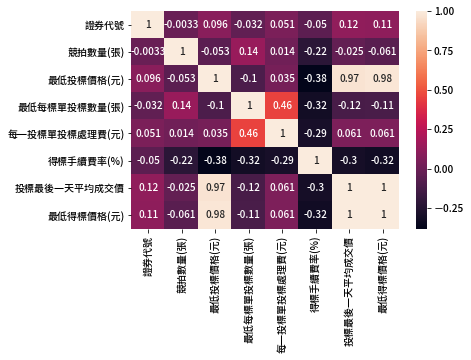

In [924]:
corrMatrix = df1_stock.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


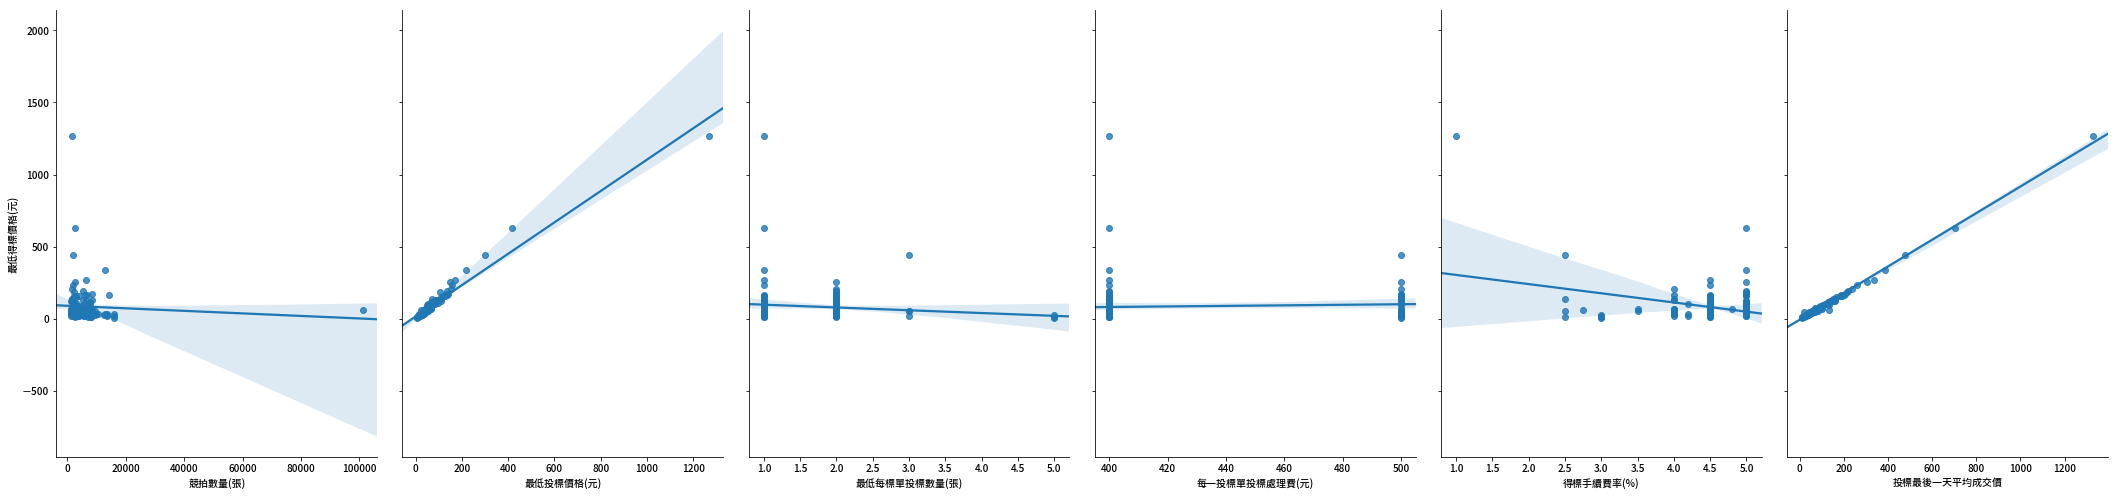

In [925]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')


## 發現最低投標價12多多那筆是outlier

In [926]:
outlier = df1_stock['最低投標價格(元)'] > 1200
df1_stock[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,1530,stock,1267.33,1,400,1.0,1330.0,1267.33


In [927]:
index = df1_stock[outlier].index
df1_stock.drop(index, inplace = True)

In [928]:
index = df1_stock[df1_stock['發行性質']=='第一上市初上市'].index
df1_stock.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


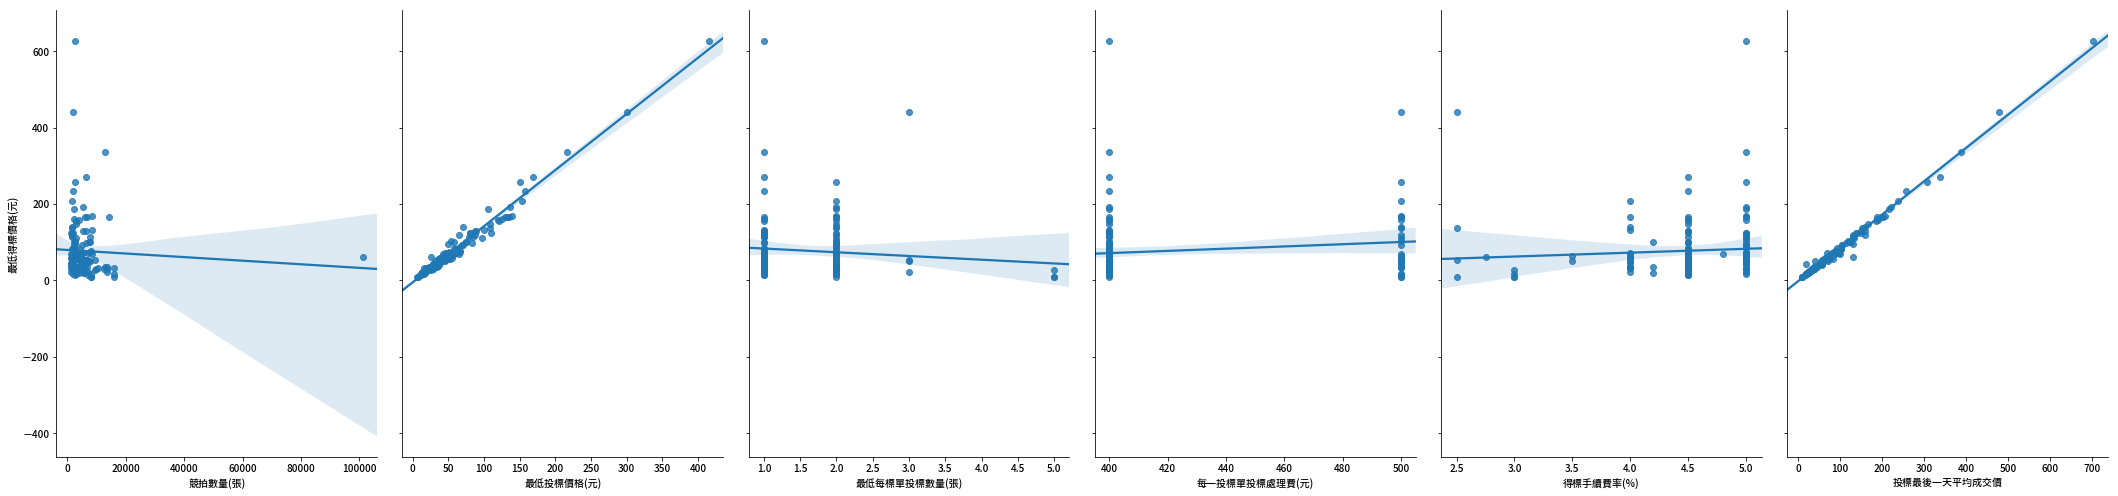

In [929]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

## 將 最低每標單投標數量(張), 每一投標單投標處理費(元), 得標手續費率(%) 轉成類別資料

In [930]:
dummies = pd.get_dummies(df1_stock['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
dummies.head()

,最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,1,0,0,0
8,1,0,0,0
10,1,0,0,0
11,1,0,0,0
12,1,0,0,0


In [931]:
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['最低每標單投標數量(張)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,400,4.8,80.84,68.60,1,0,0,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,400,4.0,67.49,58.51,1,0,0,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,400,5.0,68.97,62.40,1,0,0,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,400,4.5,76.48,63.60,1,0,0,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,400,5.0,40.32,49.90,1,0,0,0


In [932]:
dummies = pd.get_dummies(df1_stock['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['每一投標單投標處理費(元)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5,處理費_400,處理費_500
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,4.8,80.84,68.60,1,0,0,0,1,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,4.0,67.49,58.51,1,0,0,0,1,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,5.0,68.97,62.40,1,0,0,0,1,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,4.5,76.48,63.60,1,0,0,0,1,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,5.0,40.32,49.90,1,0,0,0,1,0


In [933]:
dummies = pd.get_dummies(df1_stock['得標手續費率(%)'])
dummies.columns = ['手續費_2.5', '手續費_2.75', '手續費_3', '手續費_3.5', '手續費_4', '手續費_4.2', '手續費_4.5', '手續費_4.8', '手續費_5']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['得標手續費率(%)'], axis = 1, inplace = True)

In [934]:
dummies = pd.get_dummies(df1_stock['發行性質'])
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['發行性質'], axis = 1, inplace = True)

In [935]:
df1_stock.shape

(146, 26)

In [936]:
df1_stock.drop(['開標日期', '證券名稱', '證券代號', '發行市場','類別'], axis = 1, inplace = True)

In [937]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)']
#df1_stock[num_vars] = sclaler.fit_transform(df1_stock[num_vars])
#df1_stock.head()

In [938]:
# split into train and test
df_train, df_test = train_test_split(df1_stock, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

102
44


In [939]:
y_train = df_train.pop('最低得標價格(元)')
x_train = df_train

In [940]:
y_train.shape, x_train.shape

((102,), (102, 20))

In [941]:
x_train_lm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           6.58e-98
Time:                        02:41:59   Log-Likelihood:                -311.45
No. Observations:                 102   AIC:                             654.9
Df Residuals:                      86   BIC:                             696.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6554      1.003     -0.653      0.515      -2.650       1.339
競拍數量(張)         0.0001      0.000      0.562      0.576      -0.000       0.001
最低投標價格(元)       0.2038      0.072      2.841      0.006       0.061       0.346
投標最後一天平均成交價     0.7568      0.043     17.692      0.000       0.672       0.842
最低每標單投_1       -1.5349      1.649     -0.931      0.355      -4.813       1.744
最低每標單投_2       -2.7042      1.473     -1.836      0.070      -5.632       0.224
最低每標單投_3        4.4353      3.575      1.241      0.218      -2.671      11.542
最低每標單投_5       -0.8517      3.046     -0.280      0.780      -6.907       5.204
處理費_400         1.2779      1.019      1.254      0.213      -0.748       3.304
處理費_500        -1.9333      1.310     -1.476      0.144      -4.537       0.670
手續費_2.5         6.2248      3.281      1.897      0.061      -0.298      12.748
手續費_2.75    -2.312e-15   1.74e-15     -1.328      0.188   -5.77e-15    1.15e-15
手續費_3           1.4803      2.944      0.503      0.616      -4.372       7.332
手續費_3.5         2.3445      5.236      0.448      0.655      -8.065      12.754
手續費_4          -0.4487      1.938     -0.232      0.817      -4.301       3.404
手續費_4.2        -6.4442      5.254     -1.227      0.223     -16.889       4.000
手續費_4.5        -3.1769      1.718     -1.850      0.068      -6.591       0.238
手續費_4.8         1.3562      5.220      0.260      0.796      -9.020      11.733
手續費_5          -1.9914      1.778     -1.120      0.266      -5.525       1.542
初上市            -2.1386      0.992     -2.155      0.034      -4.111      -0.166
初上櫃             1.4832      0.738      2.010      0.048       0.016       2.950
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.300
Skew:                          -0.368   Prob(JB):                        0.117
Kurtosis:                       3.687   Cond. No.                     2.63e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.3e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 計算VIF 看有沒有multicollinearity

In [942]:
vif1 = pd.DataFrame()
vif1['features'] = x_train.columns
vif1["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
9,手續費_2.5,inf
11,手續費_3,inf
18,初上市,inf
17,手續費_5,inf
16,手續費_4.8,inf
15,手續費_4.5,inf
14,手續費_4.2,inf
13,手續費_4,inf
12,手續費_3.5,inf
19,初上櫃,inf


In [943]:
x_train2 = x_train[['最低投標價格(元)','投標最後一天平均成交價','競拍數量(張)']]
x_train2_lm = sm.add_constant(x_train2)
lr_2 = sm.OLS(y_train, x_train2_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6948.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          5.51e-114
Time:                        02:42:00   Log-Likelihood:                -323.94
No. Observations:                 102   AIC:                             655.9
Df Residuals:                      98   BIC:                             666.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5729      1.215     -2.118      0.037      -4.983      -0.163
最低投標價格(元)       0.2354      0.072      3.270      0.001       0.093       0.378
投標最後一天平均成交價     0.7411      0.043     17.236      0.000       0.656       0.826
競拍數量(張)        -0.0002      0.000     -1.182      0.240      -0.001       0.000
==============================================================================
Omnibus:                        6.347   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.860
Skew:                          -0.300   Prob(JB):                       0.0196
Kurtosis:                       4.220   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [944]:
vif2 = pd.DataFrame()
vif2['features'] = x_train2.columns
vif2["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
0,最低投標價格(元),95.70
1,投標最後一天平均成交價,94.49
2,競拍數量(張),1.31


In [945]:
x_train3 = x_train[['投標最後一天平均成交價','競拍數量(張)']]
x_train3_lm = sm.add_constant(x_train3)
lr_3 = sm.OLS(y_train, x_train3_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9487.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          7.99e-114
Time:                        02:42:00   Log-Likelihood:                -329.22
No. Observations:                 102   AIC:                             664.4
Df Residuals:                      99   BIC:                             672.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1235      1.265     -1.679      0.096      -4.633       0.386
投標最後一天平均成交價     0.8802      0.007    135.195      0.000       0.867       0.893
競拍數量(張)        -0.0002      0.000     -1.091      0.278      -0.001       0.000
==============================================================================
Omnibus:                       16.667   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.834
Skew:                          -0.455   Prob(JB):                     6.76e-11
Kurtosis:                       6.192   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [946]:
vif3 = pd.DataFrame()
vif3['features'] = x_train3.columns
vif3["VIF"] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,features,VIF
0,投標最後一天平均成交價,1.29
1,競拍數量(張),1.29


In [947]:
x_train4 = x_train[['最低投標價格(元)','競拍數量(張)']]
x_train4_lm = sm.add_constant(x_train4)
lr_4 = sm.OLS(y_train, x_train4_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2574.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           4.42e-86
Time:                        02:42:01   Log-Likelihood:                -395.03
No. Observations:                 102   AIC:                             796.1
Df Residuals:                      99   BIC:                             803.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1409      2.426     -1.295      0.198      -7.954       1.672
最低投標價格(元)      1.4634      0.021     70.405      0.000       1.422       1.505
競拍數量(張)       -0.0003      0.000     -0.924      0.358      -0.001       0.000
==============================================================================
Omnibus:                        8.051   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               13.743
Skew:                           0.237   Prob(JB):                      0.00104
Kurtosis:                       4.735   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [948]:
vif4 = pd.DataFrame()
vif4['features'] = x_train4.columns
vif4["VIF"] = [variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

,features,VIF
0,最低投標價格(元),1.3
1,競拍數量(張),1.3


In [949]:
vif_summary = pd.merge(vif1, vif2, on = 'features', how = 'outer')
vif_summary = pd.merge(vif_summary, vif3, on = 'features', how = 'outer')
vif_summary = pd.merge(vif_summary, vif4, on = 'features', how = 'outer')
vif_summary.columns = ['features', 'lr1', 'lr2', 'lr3', 'lr4']
vif_summary

,features,lr1,lr2,lr3,lr4
0,手續費_2.5,inf,NaN,NaN,NaN
1,手續費_3,inf,NaN,NaN,NaN
2,初上市,inf,NaN,NaN,NaN
3,手續費_5,inf,NaN,NaN,NaN
4,手續費_4.8,inf,NaN,NaN,NaN
5,手續費_4.5,inf,NaN,NaN,NaN
6,手續費_4.2,inf,NaN,NaN,NaN
7,手續費_4,inf,NaN,NaN,NaN
8,手續費_3.5,inf,NaN,NaN,NaN
9,初上櫃,inf,NaN,NaN,NaN


In [950]:
x_train5 = x_train[['最低投標價格(元)']]
x_train5_lm = sm.add_constant(x_train5)
lr_5 = sm.OLS(y_train, x_train5_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5155.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           7.50e-88
Time:                        02:42:02   Log-Likelihood:                -395.47
No. Observations:                 102   AIC:                             794.9
Df Residuals:                     100   BIC:                             800.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7955      1.635     -2.933      0.004      -8.040      -1.551
最低投標價格(元)      1.4668      0.020     71.800      0.000       1.426       1.507
==============================================================================
Omnibus:                        8.260   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               14.150
Skew:                           0.250   Prob(JB):                     0.000846
Kurtosis:                       4.755   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [951]:
x_train6 = x_train[['投標最後一天平均成交價']]
x_train6_lm = sm.add_constant(x_train6)
lr_6 = sm.OLS(y_train, x_train6_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.894e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          8.35e-116
Time:                        02:42:02   Log-Likelihood:                -329.83
No. Observations:                 102   AIC:                             663.7
Df Residuals:                     100   BIC:                             668.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1477      0.848     -3.712      0.000      -4.830      -1.465
投標最後一天平均成交價     0.8815      0.006    137.613      0.000       0.869       0.894
==============================================================================
Omnibus:                       18.021   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.330
Skew:                          -0.502   Prob(JB):                     4.33e-12
Kurtosis:                       6.362   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 小結：從模型3, 4, 5, 6中選一個

## 殘差分析
### error terms = y_actual - y_predicted

Text(0.5, 1.0, 'lr_6')

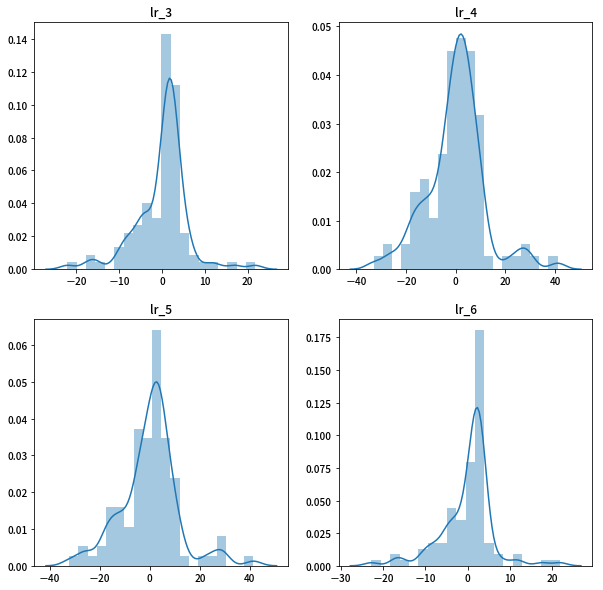

In [952]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
y_pred3 = lr_3.predict(x_train3_lm)
sn.distplot((y_train - y_pred3),bins = 20)
plt.title('lr_3')

plt.subplot(2,2,2)
y_pred4 = lr_4.predict(x_train4_lm)
sn.distplot((y_train - y_pred4),bins = 20)
plt.title('lr_4')

plt.subplot(2,2,3)
y_pred5 = lr_5.predict(x_train5_lm)
sn.distplot((y_train - y_pred5),bins = 20)
plt.title('lr_5')

plt.subplot(2,2,4)
y_pred6 = lr_6.predict(x_train6_lm)
sn.distplot((y_train - y_pred6),bins = 20)
plt.title('lr_6')